# Plotting the relationship between time to treatment and the probability of a good outcome

## Aim

* Plot the relationship between time to treatment with Alteplase and the probability of a good outcome, based on Emberson et al. [1]

Notes: 

* A good outcome is defined by Emberson et al. as having modified Rankin Scale of 0-1 at 3-6 months
* The baseline probability of a good outcome are taken from the control (untreated) groups in Emberson's meta-analysis.

[1] Emberson et al. (2014) Effect of treatment delay, age, and stroke severity on the effects of intravenous thrombolysis with alteplase for acute ischaemic stroke: A meta-analysis of individual patient data from randomised trials. The Lancet. 384: 1929–1935

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Calculate outcomes

In [2]:
# Baseline probability of good outcomes based on age
prob_good_outcome_base_under_80 = 0.3499
prob_good_outcome_base_80_plus = 0.1318

# Convert probability to odds (odds = p / (1-p))
odds_good_outcome_base_under_80 = (prob_good_outcome_base_under_80 /
                                  (1- prob_good_outcome_base_under_80))

odds_good_outcome_base_80_plus= (prob_good_outcome_base_80_plus /
                                  (1- prob_good_outcome_base_80_plus))

# Set up array of time
time_to_treatment = np.arange(0,361,10)

# Odds ratio based on time
odds_ratio = 10 ** (0.326956 + (-0.00086211 * time_to_treatment))

# Adjust odds of good outcome by age
odds_good_outcome_treated_under_80 = \
    odds_good_outcome_base_under_80 * odds_ratio
odds_good_outcome_treated_80_plus = \
    odds_good_outcome_base_80_plus * odds_ratio

# Convert odds back to probability (p = odds / (1 + odds))
prob_good_outcome_treated_under_80 = (odds_good_outcome_treated_under_80 /
                                     (1 + odds_good_outcome_treated_under_80))
prob_good_outcome_treated_80_plus = (odds_good_outcome_treated_80_plus /
                                     (1 + odds_good_outcome_treated_80_plus))

## Plot outcomes as odds ratio and probability

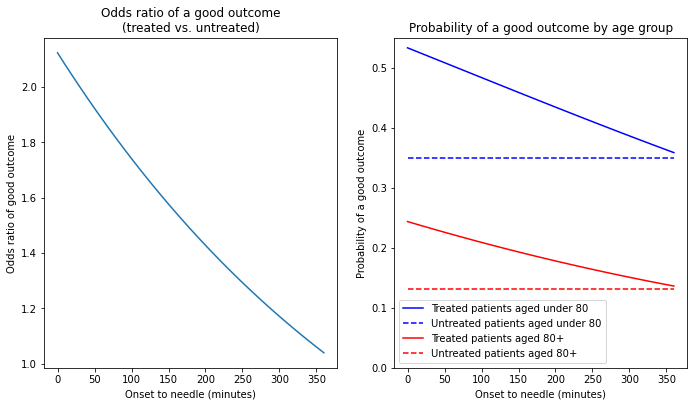

In [3]:
fig = plt.figure(figsize=(10,6))

# Plot odds ratio
ax1 = fig.add_subplot(121)
ax1.plot(time_to_treatment, odds_ratio)
ax1.set_xlabel('Onset to needle (minutes)')
ax1.set_ylabel('Odds ratio of good outcome')
ax1.set_title('Odds ratio of a good outcome\n(treated vs. untreated)')

# Plot probability of good outcome
ax2 = fig.add_subplot(122)
ax2.plot(time_to_treatment, prob_good_outcome_treated_under_80,
        label='Treated patients aged under 80', linestyle='-', color='b')
ax2.plot(time_to_treatment, 
         np.repeat(prob_good_outcome_base_under_80, len(time_to_treatment)),
        label='Untreated patients aged under 80',linestyle='--', color='b')

ax2.plot(time_to_treatment, prob_good_outcome_treated_80_plus,
        label='Treated patients aged 80+',linestyle='-', color='r')
ax2.plot(time_to_treatment, 
         np.repeat(prob_good_outcome_base_80_plus, len(time_to_treatment)),
        label='Untreated patients aged 80+',linestyle='--', color='r')

ax2.set_xlabel('Onset to needle (minutes)')
ax2.set_ylabel('Probability of a good outcome')
ax2.set_title('Probability of a good outcome by age group')
ax2.set_ylim(0, 0.55)
ax2.legend()

fig.tight_layout(pad=2)
fig.savefig('./output/thrombolysis_decline_odds_prob.jpg', dpi=300)
plt.show()

## Plot outcomes as probability only

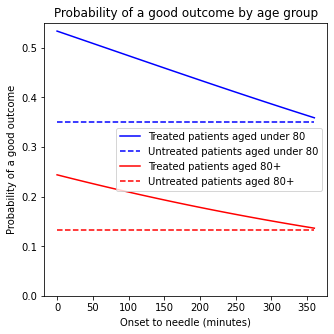

In [4]:
fig = plt.figure(figsize=(5,5))

# Plot probability of good outcome
ax1 = fig.add_subplot(111)
ax1.plot(time_to_treatment, prob_good_outcome_treated_under_80,
        label='Treated patients aged under 80', linestyle='-', color='b')
ax1.plot(time_to_treatment, 
         np.repeat(prob_good_outcome_base_under_80, len(time_to_treatment)),
        label='Untreated patients aged under 80',linestyle='--', color='b')

ax1.plot(time_to_treatment, prob_good_outcome_treated_80_plus,
        label='Treated patients aged 80+',linestyle='-', color='r')
ax1.plot(time_to_treatment, 
         np.repeat(prob_good_outcome_base_80_plus, len(time_to_treatment)),
        label='Untreated patients aged 80+',linestyle='--', color='r')

ax1.set_xlabel('Onset to needle (minutes)')
ax1.set_ylabel('Probability of a good outcome')
ax1.set_title('Probability of a good outcome by age group')
ax1.set_ylim(0, 0.55)
ax1.legend()

fig.tight_layout(pad=2)
fig.savefig('./output/thrombolysis_decline_prob.jpg', dpi=300)
plt.show()

## Observations

* Probability of a good outcome declines to close to control level over 6 hours.
* The baseline probability of a good outcome, which is different for different age groups, makes a significant difference to the absolute benefit of thrombolysis (though the odds-ratio of a good outcome is nor dependent on age).